# Network Basics

In this notebook we will look at the basics of creating networks with *NetworkX*, a popular open source Python library for network analysis. See https://networkx.org for downloads and documentation. 

Firstly, import the required modules, including NetworkX:

In [1]:
import networkx as nx
%matplotlib inline

### Creating Undirected Networks

The most basic NetworkX data structure is a *Graph*, which represents an **undirected network**. To create an empty network we use:

In [2]:
g = nx.Graph()

We can then start to add nodes and edges to the network. Nodes can be any hashable object, such as a text string, an integer, or a custom node object. We can add one node at a time:

In [3]:
g.add_node("Sarah")
g.add_node("Mark")
g.add_node("Bob")

We can also add multiple nodes at the same time from a list:

In [4]:
g.add_nodes_from(["Lisa", "Mary", "David"])

To access a list of the current nodes in the network:

In [5]:
list(g.nodes())

['Sarah', 'Mark', 'Bob', 'Lisa', 'Mary', 'David']

In [6]:
g.number_of_nodes()

6

Currently there are no edges connecting these nodes. We can easily add undirected edges by specifiying the pair of nodes:

In [7]:
g.add_edge("Mark", "Bob")
g.add_edge("Lisa", "Sarah")
g.add_edge("Colm", "Sarah")
g.add_edge("Bob", "Colm")

In [8]:
g.number_of_edges()

4

As with adding nodes, we can add multiple edges at once by specifying a list of pairs as tuples:

In [9]:
pairs = [("Mary", "David"), ("Mark", "Mary"), ("Lisa", "Colm"), ("Bob", "Lisa"), ("Colm","David")]
g.add_edges_from(pairs)

In [10]:
g.number_of_edges()

9

To access a list of the current edges in the network:

In [11]:
list(g.edges())

[('Sarah', 'Lisa'),
 ('Sarah', 'Colm'),
 ('Mark', 'Bob'),
 ('Mark', 'Mary'),
 ('Bob', 'Colm'),
 ('Bob', 'Lisa'),
 ('Lisa', 'Colm'),
 ('Mary', 'David'),
 ('David', 'Colm')]

In [12]:
g.number_of_edges()

9

If we create an edge involving a node that is not already in the network, it will automatically be added to the network.

In [13]:
g.add_edge("Mary", "Robert")

We can check if a node or an edge exists in a network:

In [14]:
"David" in g

True

In [15]:
"Alison" in g

False

In [16]:
("Mary", "Robert") in g.edges

True

In [17]:
("Sarah", "Robert") in g.edges

False

We can draw a simple diagram of the network to inspect it. We will focus on network visualisation in more detail later in the module.

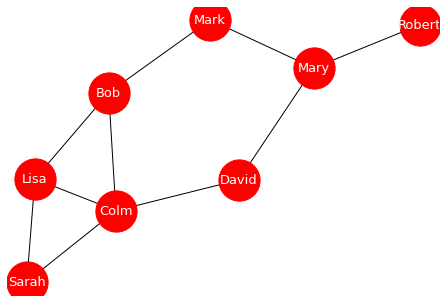

In [18]:
nx.draw(g, with_labels=True, node_color='red', node_size=1700, font_color='white', font_size=13)

For any node, we can find the list of other nodes connected to it via an edge using the *neighbors()* fuction. Note that this returns an iterator:

In [19]:
for node in g.neighbors("Mary"):
    print(node)

David
Mark
Robert


In certain types of networks we might have **self-loops** - cases where an edge exists between a node and itself.

In [20]:
g.add_edge("Robert", "Robert")

In [21]:
for node in g.neighbors("Robert"):
    print(node)

Mary
Robert


Removing nodes or edges has similar syntax to adding them. They can be removed individually or in batch. Note that attempting to remove a node or edge that does not exist will raise an exception.

In [22]:
g.remove_node("Robert")
g.nodes()

NodeView(('Sarah', 'Mark', 'Bob', 'Lisa', 'Mary', 'David', 'Colm'))

In [23]:
g.remove_nodes_from(["Sarah","Lisa"])
# look at list of nodes that remain
list(g.nodes())

['Mark', 'Bob', 'Mary', 'David', 'Colm']

In [24]:
g.remove_edge("Mark", "Mary")
# look at list of edges that remain
list(g.edges())

[('Mark', 'Bob'), ('Bob', 'Colm'), ('Mary', 'David'), ('David', 'Colm')]

Draw the final network:

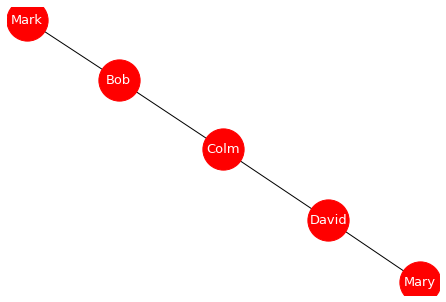

In [25]:
nx.draw(g, with_labels=True, node_color='red', node_size=1700, font_color='white', font_size=13)

### Directed Networks

A **directed network** is a set of nodes connected by edges, where the edges have a direction associated with them. In NetworkX, this type of network is implemented as a *DiGraph* object. As with undirected networks, we call the *add_edge()* function. But now the order of the nodes matters.

In [26]:
g = nx.DiGraph()
g.add_edge("Dublin", "Madrid")
g.add_edge("Dublin", "Rome")
g.add_edge("Madrid", "Dublin")
g.add_edge("London", "Dublin")
g.add_edge("Rome", "Dublin")
g.add_edge("Rome", "London")

In [27]:
g.number_of_nodes()

4

In [28]:
list(g.nodes())

['Dublin', 'Madrid', 'Rome', 'London']

In [29]:
g.number_of_edges()

6

In [30]:
list(g.edges())

[('Dublin', 'Madrid'),
 ('Dublin', 'Rome'),
 ('Madrid', 'Dublin'),
 ('Rome', 'Dublin'),
 ('Rome', 'London'),
 ('London', 'Dublin')]

Again, we can produce a quick diagram displaying the network:

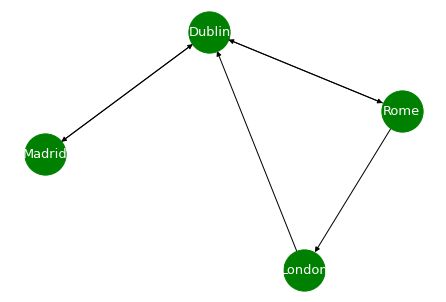

In [31]:
nx.draw(g, with_labels=True, node_color='green', node_size=1700, font_color='white', font_size=13)

We can measure the **reciprocity** of this network - i.e. the fraction of reciprocated edges (edges pointing in both directions ):

In [32]:
nx.reciprocity(g)

0.6666666666666666

In a directed network, we can access the **predecessors** of each node *x* -- the set of nodes which have an edge that ends at *x*. Again this function returns an iterator:

In [33]:
for node in g.predecessors("Dublin"):
    print(node)

Madrid
London
Rome


We can also access the **successors** of each node *x* -- the set of nodes which have an edge that starts at *x*. This gives the same output as *neighbors()* for a directed network.

In [34]:
for node in g.successors("Dublin"):
    print(node)

Madrid
Rome


In [35]:
for node in g.neighbors("Dublin"):
    print(node)

Madrid
Rome


Some network analysis algorithms only work with undirected networks. To convert a directed network to an undirected network, use *to_undirected()*. This creates a copy of the original network, where the edges no longer have direction. Note that the new network does not have duplicate edges.

In [36]:
g2 = g.to_undirected()

In [37]:
g2.number_of_edges()

4

Get a Python list containing the edge pairs:

In [38]:
list(g2.edges())

[('Dublin', 'Madrid'),
 ('Dublin', 'Rome'),
 ('Dublin', 'London'),
 ('Rome', 'London')]

Let's draw the undirected network. Notice there are no longer any arrows on the edges (i.e. they have no direction).

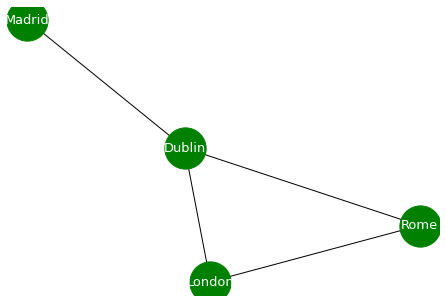

In [39]:
nx.draw(g2, with_labels=True, node_color='green', node_size=1700, font_color='white', font_size=13)